In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Homes\hotel_bookings.csv")

In [5]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
118143,City Hotel,0,1,2017,August,33,14,1,0,2,...,No Deposit,7.0,NaN,0,Transient,144.00,0,1,Check-Out,2017-08-15
17697,Resort Hotel,0,283,2015,October,42,12,2,5,2,...,No Deposit,273.0,NaN,0,Transient-Party,77.57,0,0,Check-Out,2015-10-19
113744,City Hotel,0,38,2017,June,23,9,0,2,2,...,No Deposit,9.0,NaN,0,Transient,190.00,0,3,Check-Out,2017-06-11
54277,City Hotel,1,75,2016,July,29,11,1,1,1,...,No Deposit,9.0,NaN,0,Transient,123.30,0,0,Canceled,2016-05-09
52207,City Hotel,1,330,2016,June,23,2,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21
80320,City Hotel,1,33,2015,December,50,9,0,2,2,...,Non Refund,44.0,NaN,0,Transient,110.00,0,0,Canceled,2015-11-16
20579,Resort Hotel,0,0,2016,February,8,18,0,1,1,...,No Deposit,NaN,NaN,0,Transient,40.00,0,0,Check-Out,2016-02-19
30552,Resort Hotel,0,133,2016,November,48,20,2,5,1,...,No Deposit,314.0,NaN,0,Transient-Party,46.64,0,1,Check-Out,2016-11-27
69907,City Hotel,1,181,2017,June,23,8,0,2,2,...,Non Refund,58.0,NaN,0,Transient,100.00,0,0,Canceled,2017-01-24
6106,Resort Hotel,0,224,2016,May,22,25,1,4,2,...,No Deposit,NaN,223.0,0,Transient-Party,46.00,0,0,Check-Out,2016-05-30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
ndf = df[['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'adults', 'children', 'babies', 
         'country', 'reserved_room_type', 'assigned_room_type', 'reservation_status','reservation_status_date' ]]

In [13]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   arrival_date_year        119390 non-null  int64  
 3   arrival_date_month       119390 non-null  object 
 4   adults                   119390 non-null  int64  
 5   children                 119386 non-null  float64
 6   babies                   119390 non-null  int64  
 7   country                  118902 non-null  object 
 8   reserved_room_type       119390 non-null  object 
 9   assigned_room_type       119390 non-null  object 
 10  reservation_status       119390 non-null  object 
 11  reservation_status_date  119390 non-null  object 
 12  Room_Status              119390 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 11.8+ MB


In [19]:
ndf.shape

(119390, 13)

In [17]:
ndf['Room_Status'] = np.where(ndf['reserved_room_type'] == ndf['assigned_room_type'], 'Same', 'Different')

C:\Users\Homes\AppData\Local\Temp\ipykernel_10700\630068694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Room_Status'] = np.where(ndf['reserved_room_type'] == ndf['assigned_room_type'], 'Same', 'Different')


In [20]:
ndf['guest_type'] = np.where(
    (ndf['adults'] == 2) & (ndf['children'] == 0) & (ndf['babies'] == 0),
    'Couple',
    np.where(
        (ndf['adults'] == 1) & (ndf['children'] == 0) & (ndf['babies'] == 0),
        'Single',
        'Family'
    )
)

C:\Users\Homes\AppData\Local\Temp\ipykernel_10700\1194938934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['guest_type'] = np.where(


In [21]:
ndf.sample(7)

,hotel,is_canceled,arrival_date_year,arrival_date_month,adults,children,babies,country,reserved_room_type,assigned_room_type,reservation_status,reservation_status_date,Room_Status,guest_type
108342,City Hotel,0,2017,March,2,0.0,0,FRA,A,A,Check-Out,2017-03-26,Same,Couple
93893,City Hotel,0,2016,July,2,0.0,0,GBR,B,B,Check-Out,2016-07-28,Same,Couple
45995,City Hotel,1,2015,December,2,0.0,0,PRT,A,A,Canceled,2015-10-22,Same,Couple
30281,Resort Hotel,0,2016,November,2,0.0,0,AUS,E,E,Check-Out,2016-11-19,Same,Couple
105310,City Hotel,0,2017,February,2,0.0,0,PRT,A,A,Check-Out,2017-02-05,Same,Couple
28797,Resort Hotel,0,2016,October,2,0.0,0,IRL,D,F,Check-Out,2016-10-11,Different,Couple
77850,City Hotel,0,2015,September,1,0.0,0,GBR,A,A,Check-Out,2015-09-29,Same,Single


In [22]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   is_canceled              119390 non-null  int64  
 2   arrival_date_year        119390 non-null  int64  
 3   arrival_date_month       119390 non-null  object 
 4   adults                   119390 non-null  int64  
 5   children                 119386 non-null  float64
 6   babies                   119390 non-null  int64  
 7   country                  118902 non-null  object 
 8   reserved_room_type       119390 non-null  object 
 9   assigned_room_type       119390 non-null  object 
 10  reservation_status       119390 non-null  object 
 11  reservation_status_date  119390 non-null  object 
 12  Room_Status              119390 non-null  object 
 13  guest_type               119390 non-null  object 
dtypes: f

In [23]:
ndf.describe()

,is_canceled,arrival_date_year,adults,children,babies
count,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,2016.156554,1.856403,0.103890,0.007949
std,0.482918,0.707476,0.579261,0.398561,0.097436
min,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,0.000000,2016.000000,2.000000,0.000000,0.000000
50%,0.000000,2016.000000,2.000000,0.000000,0.000000
75%,1.000000,2017.000000,2.000000,0.000000,0.000000
max,1.000000,2017.000000,55.000000,10.000000,10.000000


In [29]:
ndf.groupby(ndf['guest_type'])['hotel'].value_counts()

guest_type  hotel       
Couple      City Hotel      53523
            Resort Hotel    28034
Family      City Hotel      10243
            Resort Hotel     5013
Single      City Hotel      15564
            Resort Hotel     7013
Name: count, dtype: int64

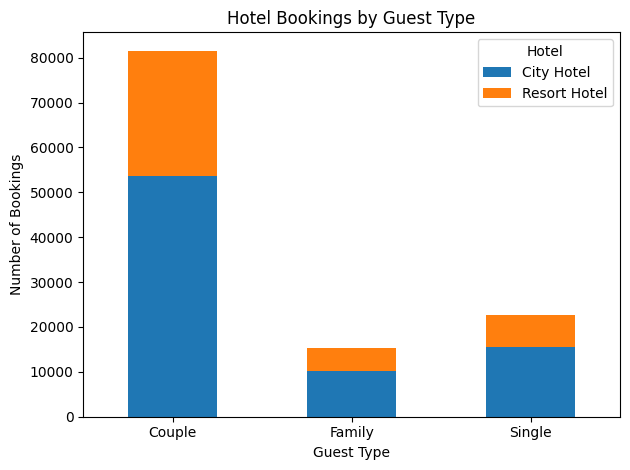

In [30]:
ndf.groupby(ndf['guest_type'])['hotel'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Hotel Bookings by Guest Type')
plt.xlabel('Guest Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


In [33]:
ndf.groupby(ndf['Room_Status'])[['Room_Status','is_canceled']].value_counts()

Room_Status  is_canceled
Different    0              14115
             1                802
Same         0              61051
             1              43422
Name: count, dtype: int64

In [34]:
ndf.groupby(ndf['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: count, dtype: int64

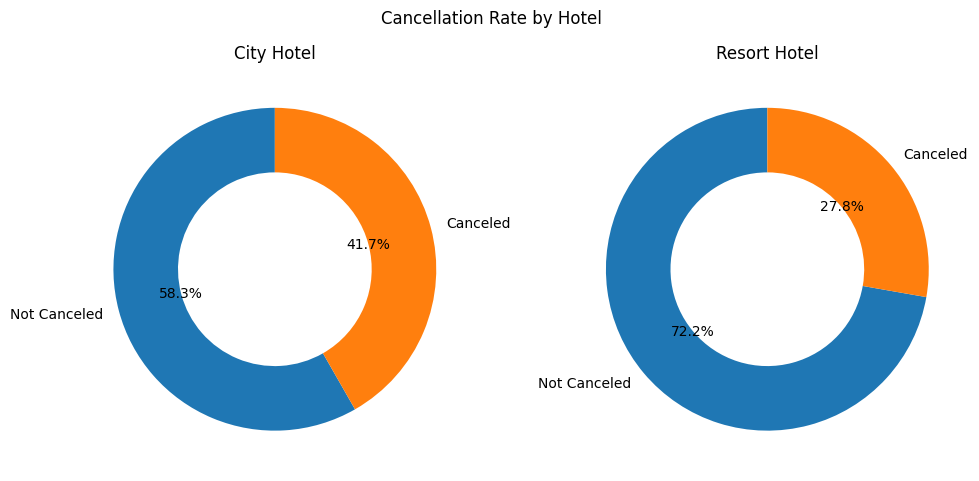

In [45]:
# Get cancellation counts by hotel and status
cancel_counts = ndf.groupby('hotel')['is_canceled'].value_counts().unstack()

# Plot donut charts for each hotel
fig, axes = plt.subplots(1, len(cancel_counts), figsize=(10, 5))
if len(cancel_counts) == 1:
	axes = [axes]
for ax, (hotel, counts) in zip(axes, cancel_counts.iterrows()):
	counts.plot(
		kind='pie',
		labels=['Not Canceled', 'Canceled'],
		autopct='%1.1f%%',
		wedgeprops={'width': 0.4},
		ax=ax,
		startangle=90
	)
	ax.set_title(f'{hotel}')
	ax.set_ylabel('')

plt.suptitle('Cancellation Rate by Hotel')
plt.tight_layout()
plt.show()

In [35]:
ndf.groupby(ndf['hotel'])['hotel'].count()

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

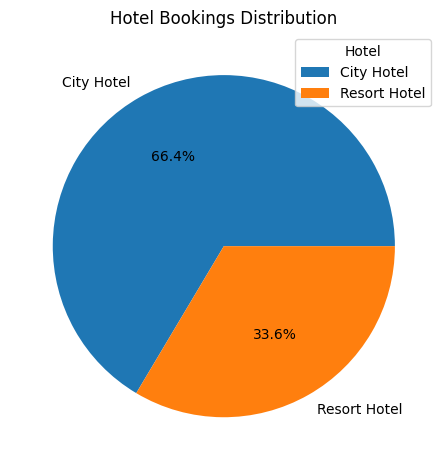

In [39]:
ndf.groupby(ndf['hotel'])['hotel'].count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Hotel Bookings Distribution')
plt.ylabel('')
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


In [ ]:
ndf.groupby(ndf['arrival_date_month'])[['hotel', 'is_canceled']].value_counts()

arrival_date_month  hotel         is_canceled
April               City Hotel    0              4015
                                  1              3465
                    Resort Hotel  0              2550
                                  1              1059
August              City Hotel    0              5381
                                  1              3602
                    Resort Hotel  0              3257
                                  1              1637
December            City Hotel    0              2392
                    Resort Hotel  0              2017
                    City Hotel    1              1740
                    Resort Hotel  1               631
February            City Hotel    0              3064
                    Resort Hotel  0              2308
                    City Hotel    1              1901
                    Resort Hotel  1               795
January             City Hotel    0              2254
                    Resort Hotel  0 

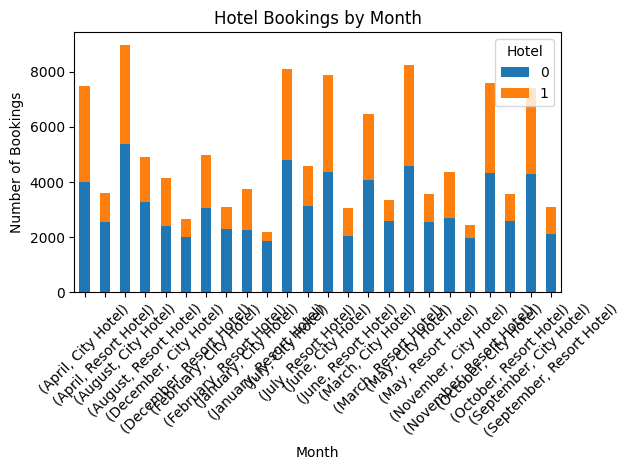

In [41]:
ndf.groupby(ndf['arrival_date_month'])[['hotel', 'is_canceled']].value_counts()
ndf.groupby(ndf['arrival_date_month'])[['hotel', 'is_canceled']].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Hotel Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


In [37]:
ndf.groupby(ndf['arrival_date_month'])[['arrival_date_month', 'is_canceled']].value_counts()

arrival_date_month  is_canceled
April               0              6565
                    1              4524
August              0              8638
                    1              5239
December            0              4409
                    1              2371
February            0              5372
                    1              2696
January             0              4122
                    1              1807
July                0              7919
                    1              4742
June                0              6404
                    1              4535
March               0              6645
                    1              3149
May                 0              7114
                    1              4677
November            0              4672
                    1              2122
October             0              6914
                    1              4246
September           0              6392
                    1              4116
Name: co

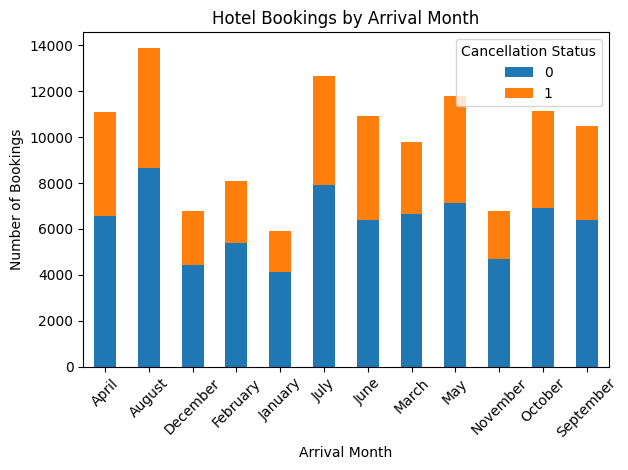

In [40]:
ndf.groupby(ndf['arrival_date_month'])[['arrival_date_month', 'is_canceled']].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Hotel Bookings by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status')
plt.tight_layout()
plt.show()

In [46]:
ndf.to_csv(r"C:\Users\Homes\hotel_bookings_cleaned.csv", index=False)